<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793108/blob/main/Semana6_visualizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nombre: Jhonathan Ricardo Robayo Martínez

Matrícula: A01793108

Materia: Ciencia y Analítica de Datos

Profesor: Jobish Vallikavungal

Asesor: Juan Miguel Meza

Fecha: 2022-10-02

# 1. Carga data

In [199]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler 
from sklearn.decomposition import PCA
import matplotlib as mpl
import matplotlib.pyplot as plt

In [200]:
path = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"

data = pd.read_csv(path, sep= ",", index_col = 0)
data.index.name = None
data = data.rename(columns = {
    'X1': 'MontoCredito',      'X2': 'Genero', 'X3' : 'NivelEducacion',
    'X4': 'EstadoCivil',       'X5': 'Edad',   'X6' : 'HistorialPagoSep',
    'X7': 'HistorialPagoAgo',  'X8': 'HistorialPagoJul', 'X9' : 'HistorialPagoJun',
    'X10': 'HistorialPagoMay', 'X11': 'HistorialPagoAbr', 'X12' : 'EstadoCuentaSep',
    'X13': 'EstadoCuentaAgo',  'X14': 'EstadoCuentaJul', 'X15' : 'EstadoCuentaJun',
    'X16': 'EstadoCuentaMay',  'X17': 'EstadoCuentaAbr', 'X18' : 'MontoPagoAnteriorSep',
    'X19': 'MontoPagoAnteriorAgo', 'X20': 'MontoPagoAnteriorJul', 
    'X21': 'MontoPagoAnteriorJun', 'X22': 'MontoPagoAnteriorMay', 
    'X23': 'MontoPagoAnteriorAbr'})

# 2. Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [201]:
data.shape

(30000, 24)

In [202]:
data.columns

Index(['MontoCredito', 'Genero', 'NivelEducacion', 'EstadoCivil', 'Edad',
       'HistorialPagoSep', 'HistorialPagoAgo', 'HistorialPagoJul',
       'HistorialPagoJun', 'HistorialPagoMay', 'HistorialPagoAbr',
       'EstadoCuentaSep', 'EstadoCuentaAgo', 'EstadoCuentaJul',
       'EstadoCuentaJun', 'EstadoCuentaMay', 'EstadoCuentaAbr',
       'MontoPagoAnteriorSep', 'MontoPagoAnteriorAgo', 'MontoPagoAnteriorJul',
       'MontoPagoAnteriorJun', 'MontoPagoAnteriorMay', 'MontoPagoAnteriorAbr',
       'Y'],
      dtype='object')

In [203]:
data.head()

,MontoCredito,Genero,NivelEducacion,EstadoCivil,Edad,HistorialPagoSep,HistorialPagoAgo,HistorialPagoJul,HistorialPagoJun,HistorialPagoMay,...,EstadoCuentaJun,EstadoCuentaMay,EstadoCuentaAbr,MontoPagoAnteriorSep,MontoPagoAnteriorAgo,MontoPagoAnteriorJul,MontoPagoAnteriorJun,MontoPagoAnteriorMay,MontoPagoAnteriorAbr,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [204]:
data.dtypes

MontoCredito              int64
Genero                  float64
NivelEducacion          float64
EstadoCivil             float64
Edad                    float64
HistorialPagoSep        float64
HistorialPagoAgo        float64
HistorialPagoJul        float64
HistorialPagoJun        float64
HistorialPagoMay        float64
HistorialPagoAbr        float64
EstadoCuentaSep         float64
EstadoCuentaAgo         float64
EstadoCuentaJul         float64
EstadoCuentaJun         float64
EstadoCuentaMay         float64
EstadoCuentaAbr         float64
MontoPagoAnteriorSep    float64
MontoPagoAnteriorAgo    float64
MontoPagoAnteriorJul    float64
MontoPagoAnteriorJun    float64
MontoPagoAnteriorMay    float64
MontoPagoAnteriorAbr    float64
Y                       float64
dtype: object

In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MontoCredito          30000 non-null  int64  
 1   Genero                29999 non-null  float64
 2   NivelEducacion        29998 non-null  float64
 3   EstadoCivil           29998 non-null  float64
 4   Edad                  29995 non-null  float64
 5   HistorialPagoSep      29997 non-null  float64
 6   HistorialPagoAgo      29995 non-null  float64
 7   HistorialPagoJul      29993 non-null  float64
 8   HistorialPagoJun      29991 non-null  float64
 9   HistorialPagoMay      29984 non-null  float64
 10  HistorialPagoAbr      29986 non-null  float64
 11  EstadoCuentaSep       29989 non-null  float64
 12  EstadoCuentaAgo       29989 non-null  float64
 13  EstadoCuentaJul       29987 non-null  float64
 14  EstadoCuentaJun       29985 non-null  float64
 15  EstadoCuentaMay    

In [206]:
data.isna()

,MontoCredito,Genero,NivelEducacion,EstadoCivil,Edad,HistorialPagoSep,HistorialPagoAgo,HistorialPagoJul,HistorialPagoJun,HistorialPagoMay,...,EstadoCuentaJun,EstadoCuentaMay,EstadoCuentaAbr,MontoPagoAnteriorSep,MontoPagoAnteriorAgo,MontoPagoAnteriorJul,MontoPagoAnteriorJun,MontoPagoAnteriorMay,MontoPagoAnteriorAbr,Y
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29999,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# 3. Limpia los datos eliminando los registros nulos o rellena con la media de la columna

Considero que es adecuado eliminar las observaciones con datos vacios, dado que los presentan en varias columnas, pues llenarlos con la media ocacionaria que sean en absoluto irreales o totalmente sintéticas. Esta decisión radical, es también dado que no suman más del 1% del total de la información.

Para la característica del estado civil, que no tiene los niveles descritos en la metadata, se la imputó con la moda. Mientras que para el nivel de educación, se consideró que es preferible es tomar valores de otros.

In [207]:
data.dropna(axis = 0, inplace = True)
modaEstadoCivil = data['EstadoCivil'].mode()[0]
# modaNivelEducacion = data['NivelEducacion'].mode()[0]
data['EstadoCivil'] = data['EstadoCivil'].map({0:modaEstadoCivil, 1:1, 2:2, 3:3}) 
data['NivelEducacion'] = data['NivelEducacion'].map({0:4, 1:1, 2:2, 3:3, 4:4, 5:4, 6:4}) 

2.0

# 4. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [44]:
data.iloc[:,0:10].describe()

,MontoCredito,Genero,NivelEducacion,EstadoCivil,Edad,HistorialPagoSep,HistorialPagoAgo,HistorialPagoJul,HistorialPagoJun,HistorialPagoMay
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,167555.900928,1.604012,1.842212,1.555344,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,-0.266807
std,129737.299088,0.489070,0.744557,0.518115,9.214319,1.123989,1.197171,1.196026,1.168419,1.132307
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000


Son muchas variables elegiré algunas interesantes para ser comentadas. 

Por ejemplo, el monto de crédito otrogado, es relevante de mencionar por el análisis en cuestión. Podemos observar que la variable tiene un sesgo hacia la derecha. El 75% de los datos se concentran hasta 240 000, con un valor máximo de 1 000 0000, por lo que podría considerarse excluir o considerar en las estimaciones de la variable dependiente de ser el caso, para que ese sesgo no afecte en un futuro. Es probable que darle un mayor análisis nos permite entender si las personas con mayor educación y edad reciben estos montos.

En cuanto a la educación las personas con minima edad es 21 años y el 75% se concentra en 41%, al ser la mediana cercana a la media, no parece existir mucho sesgo, recordemos que las variables dependientes normales facilitan el entrenamiento. 



In [40]:
data.iloc[:,10:].describe()

,HistorialPagoAbr,EstadoCuentaSep,EstadoCuentaAgo,EstadoCuentaJul,EstadoCuentaJun,EstadoCuentaMay,EstadoCuentaAbr,MontoPagoAnteriorSep,MontoPagoAnteriorAgo,MontoPagoAnteriorJul,MontoPagoAnteriorJun,MontoPagoAnteriorMay,MontoPagoAnteriorAbr,Y
count,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,-0.291575,51248.119901,49200.493825,4.703239e+04,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,1.149303,73674.949943,71211.232744,6.938524e+04,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.000000,3559.250000,2984.000000,2.664750e+03,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,0.000000,22379.000000,21194.500000,2.008550e+04,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,0.000000,67190.000000,64027.750000,6.018300e+04,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000,0.000000
max,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


# 5. Realiza el conteo de las variables categóricas

In [46]:
print(data.groupby(['Genero']).size()) 
print(data.groupby(['EstadoCivil']).size()) 
print(data.groupby(['NivelEducacion']).size())

Genero
1.0    11863
2.0    18095
dtype: int64
EstadoCivil
1.0    13643
2.0    15993
3.0      322
dtype: int64
NivelEducacion
1    10572
2    14009
3     4909
4      468
dtype: int64


# 6. Escala los datos, si consideras necesario

Procedo a retir la variable Genero y Estado civil porque son variables categoricas que no podrian ser utiles en el ACP. Mantengo la de nivel de educacion, dado que se puede considerar como ordinal y si 4<3<2<1

In [86]:
data_Reducion = data.drop(labels=['Genero', 'EstadoCivil', 'Y'], axis=1)

In [88]:
scaler = MinMaxScaler().fit(data_Reducion)
data_Scaler = scaler.fit_transform(data_Reducion)
data_Scaler.shape

(29958, 21)

# 7. Reduce las dimensiones con PCA, si consideras necesario.

1.   Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%
2.   Indica la importancia de las variables en cada componente



In [104]:
pcs = PCA(n_components = 20)
pcs.fit(data_Scaler)

pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)#column 
                          }
                          )
pcsSummary

,Standard deviation,Proportion of variance,Cumulative proportion
0,0.267367,0.342643,0.342643
1,0.233482,0.261297,0.603941
2,0.164108,0.129088,0.733029
3,0.138828,0.092381,0.825409
4,0.096697,0.044819,0.870228
5,0.089805,0.038657,0.908885
6,0.073838,0.026133,0.935018
7,0.060232,0.017390,0.952407
8,0.051868,0.012895,0.965302
9,0.042550,0.008678,0.973980


In [105]:
pcsSummary = pcsSummary.transpose()
pcsSummary.round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Standard deviation,0.27,0.23,0.16,0.14,0.10,0.09,0.07,0.06,0.05,0.04,0.04,0.03,0.03,0.02,0.02,0.02,0.02,0.01,0.01,0.01
Proportion of variance,0.34,0.26,0.13,0.09,0.04,0.04,0.03,0.02,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Cumulative proportion,0.34,0.60,0.73,0.83,0.87,0.91,0.94,0.95,0.97,0.97,0.98,0.99,0.99,0.99,1.00,1.00,1.00,1.00,1.00,1.00


Podemos observar que, para concentrar cerca del 70% del total d la información, tan solo necesitamos 3 componentes. Lo cual cumpliría nuestro proposito de análisis, es posible construir un modelo de regresión, aunque no garantirazaría una correcta predicción dado que no existiría obligatoriamente una relación entre las variables.

In [107]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'
                                         , 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20'],
                                index=data_Reducion.columns
                                )
pcsComponents_df.round(3 )

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
MontoCredito,-0.207,-0.055,0.464,0.439,0.239,-0.692,-0.044,0.029,-0.007,0.005,-0.072,-0.020,-0.023,-0.012,-0.008,-0.008,-0.003,-0.004,0.004,-0.001
NivelEducacion,0.729,-0.644,-0.071,0.205,0.042,-0.069,-0.008,0.004,-0.004,0.001,0.001,-0.004,0.003,-0.002,-0.000,-0.001,-0.001,-0.001,0.000,0.000
Edad,0.071,-0.212,0.741,-0.627,-0.028,0.084,0.007,0.000,0.001,-0.003,0.005,0.002,0.002,0.001,-0.000,-0.000,0.000,-0.000,-0.000,-0.000
HistorialPagoSep,0.224,0.234,0.007,-0.066,-0.537,-0.282,-0.642,-0.293,-0.152,-0.029,0.029,0.006,0.011,0.004,0.010,0.001,0.004,-0.000,-0.000,-0.001
HistorialPagoAgo,0.278,0.295,0.021,-0.057,-0.371,-0.253,0.252,0.586,0.455,0.111,0.001,-0.030,0.023,-0.012,0.031,-0.020,-0.010,-0.003,-0.002,0.000
HistorialPagoJul,0.283,0.311,0.028,-0.055,-0.059,-0.182,0.562,-0.123,-0.620,-0.256,0.005,-0.007,0.009,0.001,-0.030,0.014,0.026,0.009,-0.004,-0.001
HistorialPagoJun,0.277,0.311,0.043,-0.042,0.268,-0.047,0.171,-0.568,0.319,0.541,-0.003,-0.011,0.005,-0.008,0.014,0.037,-0.030,0.003,0.004,0.005
HistorialPagoMay,0.260,0.301,0.050,-0.021,0.403,0.059,-0.186,-0.055,0.353,-0.709,-0.007,0.008,-0.003,0.082,-0.020,-0.034,0.009,0.000,0.003,-0.006
HistorialPagoAbr,0.246,0.292,0.057,-0.012,0.438,0.136,-0.371,0.473,-0.391,0.339,-0.012,0.064,-0.060,-0.050,0.018,0.010,0.007,-0.009,-0.003,0.003
EstadoCuentaSep,0.041,0.067,0.214,0.276,-0.169,0.247,0.034,-0.014,0.032,0.005,-0.173,0.358,-0.322,0.231,-0.205,0.366,0.086,0.312,-0.421,-0.053


Para encontrar brevemente las variables más importantes en cada componente, se seleciona las 5 primeras, usualmente estas permiten colocarle un nombre a las componentes.

In [108]:
print(pcsComponents_df.PC1.abs().nlargest())
print(pcsComponents_df.PC2.abs().nlargest())
print(pcsComponents_df.PC3.abs().nlargest())
print(pcsComponents_df.PC4.abs().nlargest())
print(pcsComponents_df.PC5.abs().nlargest())

NivelEducacion      0.728773
HistorialPagoJul    0.283288
HistorialPagoAgo    0.278220
HistorialPagoJun    0.276881
HistorialPagoMay    0.259632
Name: PC1, dtype: float64
NivelEducacion      0.644241
HistorialPagoJun    0.310767
HistorialPagoJul    0.310625
HistorialPagoMay    0.300651
HistorialPagoAgo    0.294965
Name: PC2, dtype: float64
Edad               0.740853
MontoCredito       0.464285
EstadoCuentaAgo    0.224488
EstadoCuentaSep    0.213886
EstadoCuentaJun    0.204523
Name: PC3, dtype: float64
Edad               0.627014
MontoCredito       0.439341
EstadoCuentaAgo    0.288053
EstadoCuentaSep    0.275566
EstadoCuentaJun    0.258651
Name: PC4, dtype: float64
HistorialPagoSep    0.536566
HistorialPagoAbr    0.438481
HistorialPagoMay    0.403361
HistorialPagoAgo    0.371478
HistorialPagoJun    0.267873
Name: PC5, dtype: float64


**Respuesta**

La magnitud de los valores propios nos indica cuan importante es cada una de las variables para cada componente. En es dirrección estas son los 5 variables más importantes en los 5 componentes que contienen en conjunto el 91% de la información.

PC1:

NivelEducacion      0.728773

HistorialPagoJul    0.283288

HistorialPagoAgo    0.278220

HistorialPagoJun    0.276881

HistorialPagoMay    0.259632

PC2:

NivelEducacion      0.644241

HistorialPagoJun    0.310767

HistorialPagoJul    0.310625

HistorialPagoMay    0.300651

HistorialPagoAgo    0.29496537

PC3:

Edad               0.740853

MontoCredito       0.464285

EstadoCuentaAgo    0.224488

EstadoCuentaSep    0.213886

EstadoCuentaJun    0.204523

PC4:

Edad               0.627014

MontoCredito       0.439341

EstadoCuentaAgo    0.288053

EstadoCuentaSep    0.275566

EstadoCuentaJun    0.258651


Al parecer, el monto de pago anterior no es relevante para el análisis y podrían ser desvinculadas. Además el historial de pago es más importante que el estado, claro, en cuanto a varianza.

Esto se considera dado que tienen los valores de los vectores propios más altos en los componentes uno, dos y tres, los que más variabilidad aportan.


# 8. Elabora los histogramas de los atributos para visualizar su distribución


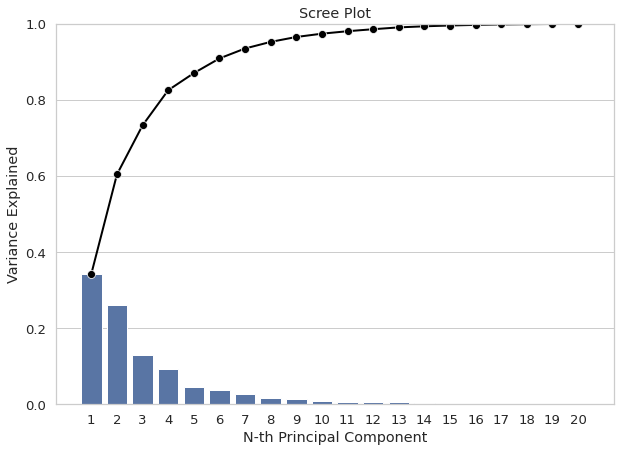

In [111]:
plt.style.use('ggplot')
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

# 9. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

# 10. Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.


In [140]:
data_ScalerPCA = pd.DataFrame(pcs.fit_transform(data_Scaler), columns = pcsComponents_df.columns)
dPCA = pcs.fit_transform(data_Scaler)

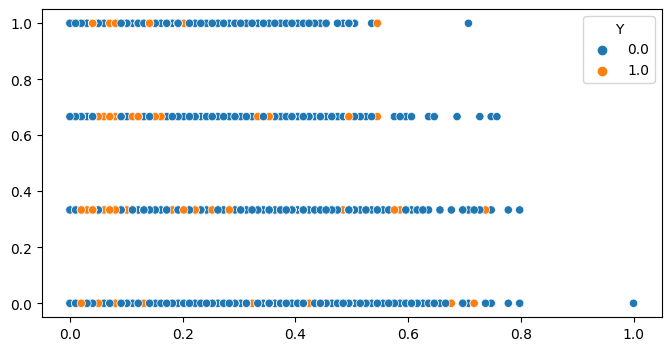

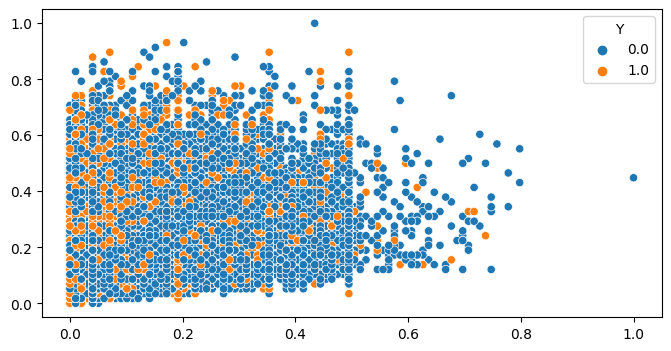

In [184]:
plt.subplots(figsize=(8, 4))
sns.scatterplot(x = data_Scaler[:,0], y= data_Scaler[:,1], hue = data['Y'])
plt.show()
plt.subplots(figsize=(8, 4))
sns.scatterplot(x = data_Scaler[:,0], y= data_Scaler[:,2], hue = data['Y'])
plt.show()

In [147]:
data_Reducion.columns

Index(['MontoCredito', 'NivelEducacion', 'Edad', 'HistorialPagoSep',
       'HistorialPagoAgo', 'HistorialPagoJul', 'HistorialPagoJun',
       'HistorialPagoMay', 'HistorialPagoAbr', 'EstadoCuentaSep',
       'EstadoCuentaAgo', 'EstadoCuentaJul', 'EstadoCuentaJun',
       'EstadoCuentaMay', 'EstadoCuentaAbr', 'MontoPagoAnteriorSep',
       'MontoPagoAnteriorAgo', 'MontoPagoAnteriorJul', 'MontoPagoAnteriorJun',
       'MontoPagoAnteriorMay', 'MontoPagoAnteriorAbr'],
      dtype='object')

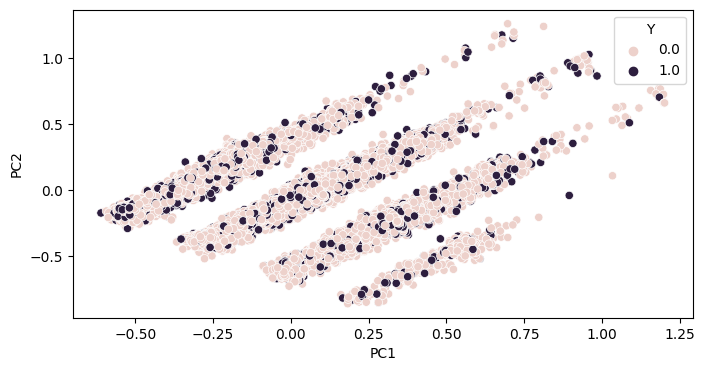

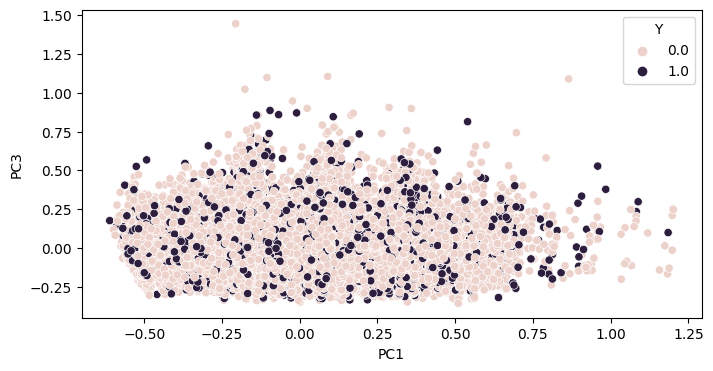

In [186]:
plt.subplots(figsize=(8, 4))
sns.scatterplot(x = 'PC1', y= 'PC2', data = data_ScalerPCA, hue = data['Y'])
plt.show()
plt.subplots(figsize=(8, 4))
sns.scatterplot(x = 'PC1', y= 'PC3', data = data_ScalerPCA, hue = data['Y'])
plt.show()

Los gráficos de la primera variable con las segunda de la data original, no parecen tener algun tipo de interpretación, y tampoco la primera con la tercera.

Lo mismo sucede cuando se cruza las proyecciones de las mismas en los componentes. No obstante esto puede cambiar si también incluimos la dirección y el tamaño de los vectores que representan a los distintos componentes, que será el siguiente gráfico. 

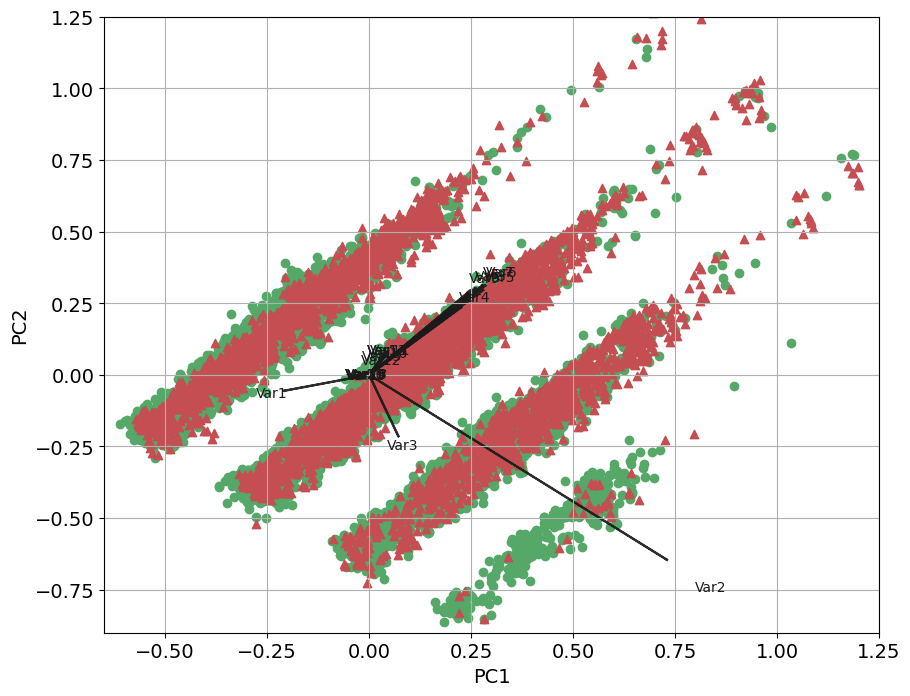

In [195]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-0.65,1.25])
    plt.ylim([-0.9,1.25])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(dPCA[:,0:2], np.transpose(pcs.components_[0:2, :]), data['Y'])
plt.show()

Uno de los beneficios que nos trae el PCA, es que 

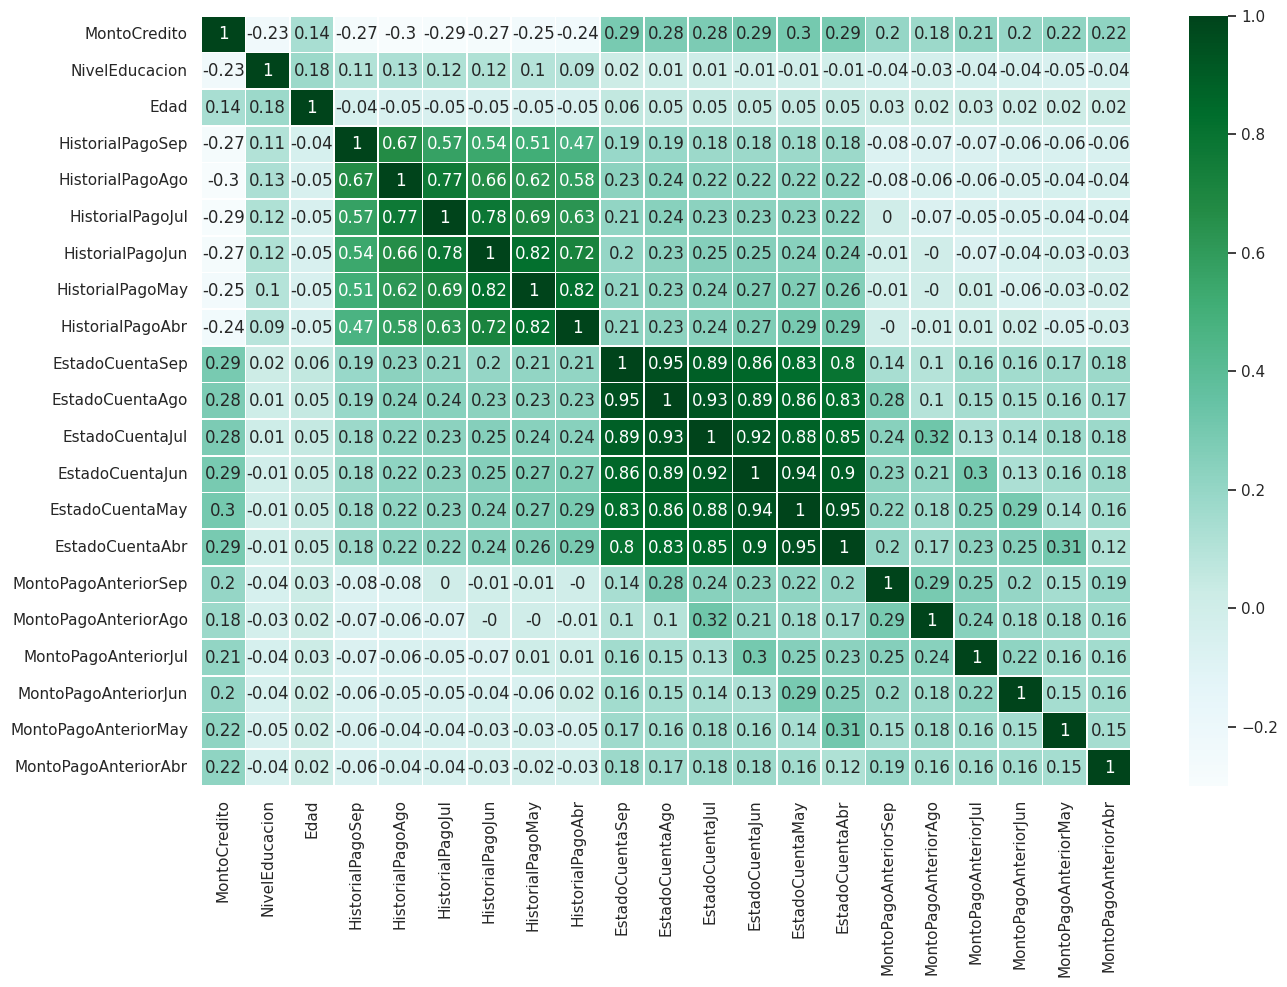

In [198]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data_Reducion.corr(method='pearson').round(2), annot = True, linewidths=.5, cmap = 'BuGn')